In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

animate = lambda i: l.set_ydata(np.sin(x + i / 50))

for i in range(len(x)):
    animate(i)
    clear_output(wait=True)
    display(fig)


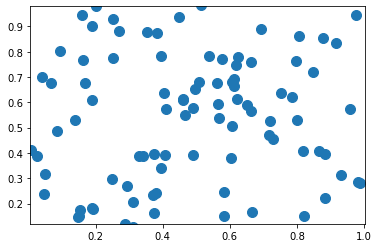

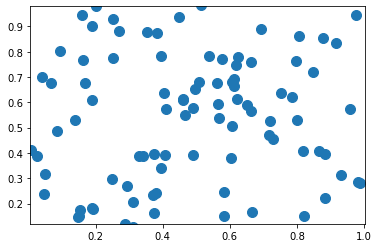

In [20]:

numpoints = 10
x, y, c = np.random.random((3, numpoints))

fig = plt.figure()
scat = plt.scatter(x, y, s=100)

for i in range(len(x)):
    scat.set_offsets(np.random.random((100,2)))
    clear_output(wait=True)
    display(fig)